Source: https://www.youtube.com/watch?v=Lsue2gEM9D0

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
genes = ['gene_' + str(i) for i in range(1, 101)]

wt = ['wt_' + str(i) for i in range(1, 6)]
ko = ['ko_' + str(i) for i in range(1, 6)]

In [3]:
# the stars unpack the 'wt' and 'ko' arrays so that the column names are a single array that looks like this:
# [wt_1, wt_2, wt_3, wt_4, wt_5, ko_1, ko_2, ko_3, ko_4, ko_5] without the stars we would create an array of two arrays and
# that wouldn't create ten columns like we want:
# [[wt_1, wt_2, wt_3, wt_4, wt_5], [ko_1, ko_2, ko_3, ko_4, ko_5]]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)
print(data.shape)
data.head()

(100, 10)


,wt_1,wt_2,wt_3,wt_4,wt_5,ko_1,ko_2,ko_3,ko_4,ko_5
gene_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for gene in data.index:
    data.loc[gene, 'wt_1': 'wt_5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko_1': 'ko_5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [5]:
data.head()

,wt_1,wt_2,wt_3,wt_4,wt_5,ko_1,ko_2,ko_3,ko_4,ko_5
gene_1,763,711,731,728,784,377,400,391,390,433
gene_2,725,765,708,696,713,396,389,393,407,378
gene_3,500,506,522,533,491,756,776,740,777,753
gene_4,457,445,411,471,487,724,727,711,746,757
gene_5,870,896,850,847,885,148,113,130,140,134


In [6]:
# We are passing in the transpose of our data the scale function expects the samples to be in rows instead of columns note we
# use samples as columns in this example because that is often how genomic data is stored

scaled_data = preprocessing.scale(data.T)

### **Principal Component Analysis**

In [7]:
pca = PCA()

In [8]:
pca.fit(scaled_data)

PCA()

In [ ]:
pca_data = pca.transform(scaled_data)

### **Scree plot**

In [10]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

In [11]:
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

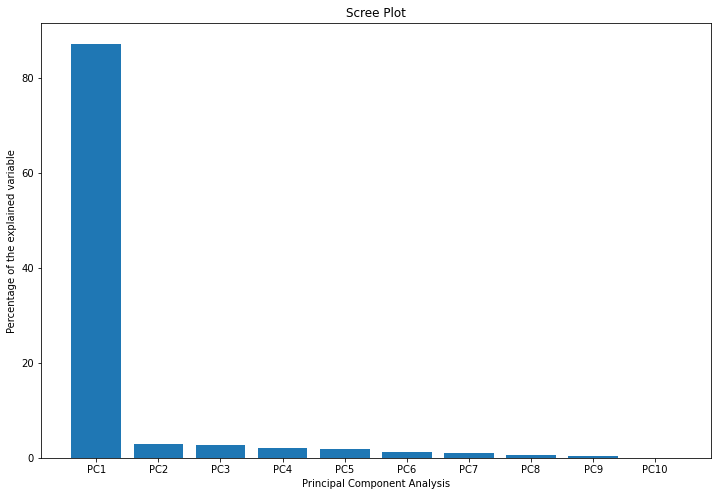

In [15]:
plt.figure(figsize=(12,8))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of the explained variable')
plt.xlabel('Principal Component Analysis')
plt.title('Scree Plot')
plt.show()

### **PCA plot**

In [16]:
pca_df = pd.DataFrame(pca_data, columns=labels, index=[*wt, *ko])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt_1,9.898026,3.433465,-0.312406,0.576982,-0.607383,0.942894,-1.096615,0.009611,0.812971,-1.137979e-15
wt_2,8.991962,-0.765402,-1.045962,-2.216312,1.855618,-1.090428,-1.154668,-0.744891,-0.189454,1.124101e-15
wt_3,9.499507,-0.774045,-1.638790,3.094571,0.774290,0.106958,0.682091,-0.220125,-0.641139,7.632783e-16
wt_4,9.296880,-1.704170,4.143494,0.397730,-0.233411,-0.142025,-0.250631,0.316042,0.015093,1.290634e-15
wt_5,8.966951,-0.266527,-1.115475,-1.999780,-1.796813,0.187591,1.874730,0.591783,-0.049417,1.054712e-15
ko_1,-9.307994,-0.035426,-0.044876,0.762286,-2.016780,-2.079873,0.109206,-1.039290,0.379216,-1.387779e-16
ko_2,-9.364310,1.620590,1.060887,-0.198411,2.537012,0.019554,1.722334,-0.129035,0.429839,-7.355228e-16
ko_3,-9.006078,-3.051472,-1.399939,0.261856,0.300007,0.869751,-0.665728,0.723222,0.909807,-3.330669e-16
ko_4,-9.796945,-0.016303,0.492379,-0.678446,-0.779347,2.209494,-0.359610,-0.973436,-0.807480,-4.440892e-16
ko_5,-9.178000,1.559289,-0.139312,-0.000475,-0.033195,-1.023918,-0.861110,1.466120,-0.859435,1.026956e-15


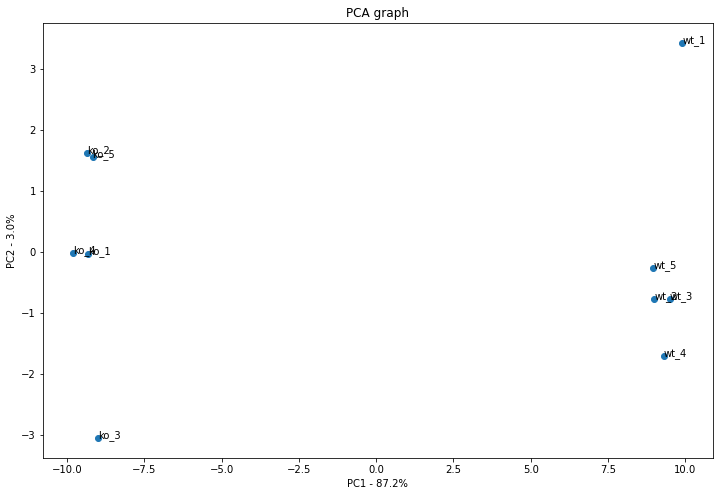

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()    

### **Loading scores**

In [19]:
# Looking for which gene have more importance in separating the two clusters

loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values

loading_scores[top_10_genes]

gene_87    0.107032
gene_21   -0.107028
gene_53    0.107019
gene_86   -0.107015
gene_29    0.107011
gene_70    0.106957
gene_97   -0.106955
gene_88    0.106950
gene_60    0.106939
gene_96    0.106937
dtype: float64